# **Import the relevant libraries :**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# **Data generation :**

In [2]:
observations = 1000

xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs-3*zs + 5 + noise

np.savez('TF_intro',inputs = generated_inputs,targets = generated_targets)

# **Solving with tensorflow :**

In [3]:
training_data = np.load('TF_intro.npz')
input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size)])

model.compile(optimizer='sgd',loss ='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'], epochs = 100, verbose = 0)

2022-04-03 13:59:56.961446: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-04-03 13:59:57.074625: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


# **Extract the weights and bias :**

In [4]:
model.layers[0].get_weights()

[array([[ 1.9711592],
        [-3.0470881]], dtype=float32),
 array([4.9957056], dtype=float32)]

In [5]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.9711592],
       [-3.0470881]], dtype=float32)

In [6]:
bias = model.layers[0].get_weights()[1]
bias

array([4.9957056], dtype=float32)

# **Extract the outputs :**

In [7]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 14.2],
       [ 24.8],
       [  9.2],
       [ 21.1],
       [ 34.7],
       [-25.3],
       [ -7.9],
       [ 33.5],
       [ 46.5],
       [  6.2],
       [-42.4],
       [ -9. ],
       [ 15.2],
       [ 21.1],
       [ -8.8],
       [ 21.6],
       [  3.4],
       [-20. ],
       [ 30.1],
       [-16. ],
       [-25. ],
       [ 47.4],
       [ 43.1],
       [-41.7],
       [-10.5],
       [ 15.8],
       [  7.5],
       [ -0.4],
       [ 12.5],
       [ 46.7],
       [-21.6],
       [ 12.5],
       [-31.8],
       [ 16.8],
       [  9.5],
       [-24.1],
       [ 15.9],
       [-20.3],
       [ 30.4],
       [ 19.7],
       [ 23.7],
       [ -9.3],
       [ -4.7],
       [ 21. ],
       [ 22.6],
       [-15.6],
       [ 15.3],
       [ 52.8],
       [ -7.6],
       [ 10. ],
       [-33.8],
       [ 22.7],
       [ 17.6],
       [ 46.2],
       [ 23. ],
       [ -4.8],
       [-16. ],
       [ -7.5],
       [ -6.6],
       [-27.2],
       [ 23.3],
       [ 31.8],
       [

# **Plotting the data :**

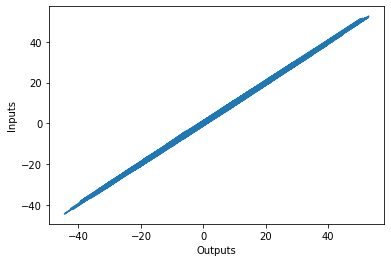

In [8]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze (training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('Inputs')
plt.show()